<img src="./img/uomlogo.png" align="left"/><br><br>
# PHYS20762 - Project - Measuring Drop Spreading Law

Draga Pihler-Puzovic<br>
University of Manchester  
January 2021

We first initialise our Python interpreter

In [2]:
# Initialisation
import string
from math import *
import numpy as np
import matplotlib.pyplot as plt
import random
from sympy import Symbol, solve

plt.rcParams.update({'font.size': 14})
plt.style.use('default')

![](./img/bee.png)
## Experimental Data

This is data that you are working with. It consists of a sequence of circle radii ($R$, measured in micrometers), obtained from image processing in three different experimental runs. The corresponding time ($t$, measured in seconds) was obtained from the image timestamps measured from the beginning of the experiment.     

In [3]:
# Radius data 
# experiment 1
radius_data1 = np.array([59.513027, 66.368389, 69.506166, 71.700852, 74.735925, 76.007795, 76.695256, 78.039551, 79.598386, 80.075493, 80.079624, 81.495363, 82.598934, 83.172805, 84.919440, 85.155809, 85.718415, 85.920147, 86.000243, 87.120934, 87.507943, 87.786892, 87.060409, 88.086562, 88.113767, 88.436448, 89.082172, 89.139957, 89.210538, 89.356928, 90.312937, 90.406557, 90.754907, 90.88941, 91.096467])
# experiment 2
radius_data2 = np.array([59.810888, 65.360919, 69.088934, 72.594631, 74.694093, 76.440186, 78.133942, 78.618537, 79.753566, 80.745559, 81.422723, 81.634563, 82.861597, 84.335873, 85.362055, 85.537714, 86.159399, 86.873675, 86.918131, 87.003533, 87.126402, 87.155440, 87.224911, 87.394479, 87.433936, 87.626938, 87.701465, 87.834029, 87.963874, 88.153147, 88.209880, 88.542036, 88.86527, 89.082038, 89.214132])
# experiment 3
radius_data3 = np.array([58.200029, 64.826353, 69.332991, 73.504694, 74.295033, 77.506575, 78.413291, 79.952682, 81.339708, 81.938359, 82.528196, 82.807452, 83.378999, 84.521468, 84.507216, 85.064265, 85.247146, 85.900079, 86.475709, 86.776052, 87.158810, 87.343755, 87.448085, 87.822712, 88.140434, 88.311032, 88.619312, 88.970210, 89.373613, 89.754486, 89.900430, 90.116608, 90.288358, 90.711677, 90.989783])
# time
time = np.array([0.500000, 1.000000, 1.500000, 2.000000, 2.500000, 3.000000, 3.500000, 4.000000, 4.500000, 5.000000, 5.500000, 6.000000, 6.500000, 7.000000, 7.500000, 8.000000, 8.500000, 9.000000, 9.500000, 10.000000, 10.500000, 11.000000, 11.500000, 12.000000, 12.500000, 13.000000, 13.500000, 14.000000, 14.500000, 15.000000, 15.500000, 16.000000, 16.500000, 17.000000, 17.500000])

Let's plot this data to see what it looks like:

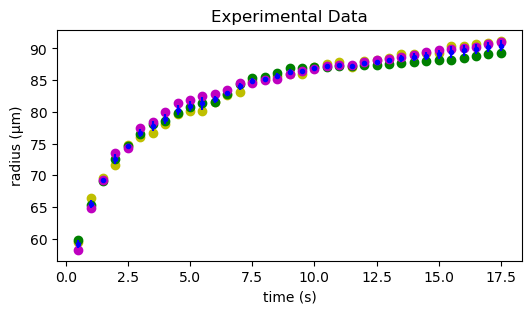

In [32]:
# tweeking the figure size
plt.rcParams["figure.figsize"] = (6,3)
plt.figure()
#calculating errors on R
radius=np.array([radius_data1,radius_data2,radius_data3])
#axis=0 means taken vertically downwards through 2D array
radius_mean=np.mean(radius,axis=0)
radius_std=np.std(radius,axis=0)
# plotting data from experimental runs 1-3:
plt.plot(time, radius_data1, "yo")
plt.plot(time, radius_data2, "go")
plt.plot(time, radius_data3, "mo")
plt.errorbar(time,radius_mean,yerr=radius_std,fmt='b.')
# setting axis labels & figures 
plt.xlabel("time (s)")
plt.ylabel("radius (\u03BCm)")
plt.title("Experimental Data")
# displaying the plot
plt.show()

Don't forget to find the errors on $R$ estimated from the three experimental runs.

![](./img/bee.png)
## Extracting Quantities Using Experimental Data

In order to find the spreading law: a relationship between the speed of the contact line ($U$) and the contact angle ($\theta$), we need to first find the quantities themselves, ie express $U$ and $\theta$ using $R=R(t)$. 

The speed of the contact line can be calculated using $U = \frac{dR}{dt} \approx \frac{R(t+\delta t)-R(t)}{\delta t}$, where $R(t+\delta t)$ and $R(t)$ are two sequential values of the footprint radii measured with time intreval $\delta t$ apart.  

To find the contact angle, we make the spherical cap approximation that allows us to calculate the height of the drop ($H$) from its volume ($V=7.6$ pL) and its footprint radius ($R$) which are known from experiments via relationship $V=\frac{\pi}{6}H(3R^2+H^2)$. The contact angle can then be found from $R$ and $H$ using $\theta = \frac{\pi}{2} - \mathrm{atan}\frac{R^2-H^2}{2HR}$. 

There are three sets of experimental data, so for each one of them a relationship $U=U(\theta)$ should be found.

In [5]:
# write your code here
def finding_speed(radius,time):
    Speed=np.zeros([len(radius)])
    for i in range(len(radius)-1):
        Speed[i]=(radius[i+1]-radius[i])/(time[i+1]-time[i])
    return Speed

def finding_H(radius):
    x = Symbol('x')
    solutions=np.zeros([len(radius)])
    for i in range(len(radius)):
        a, b, c, d = (1, 0, 3*(radius[i]*10**-6)**2,-(6*7.6*10**(-15))/np.pi)
        solutions[i]=solve(a * x ** 3 + b * x ** 2 + c * x + d)[0]
    return solutions
Heights=(finding_H(radius_data1),finding_H(radius_data2),finding_H(radius_data3))

def finding_angles(radius,H):
    angles=np.pi/2-np.arctan(((radius*10**-6)**2-H**2)/(2*H*radius*10**-6))
    return angles
Contact_angles=(finding_angles(radius_data1,Heights[0]),finding_angles(radius_data2,Heights[1]),finding_angles(radius_data3,Heights[2]))

angle_Speeds=(np.abs(finding_speed(Contact_angles[0],time)),np.abs(finding_speed(Contact_angles[1],time)),np.abs(finding_speed(Contact_angles[2],time)))
radius_Speeds=(finding_speed(radius_data1,time),finding_speed(radius_data2,time),finding_speed(radius_data3,time))

Let's plot these results to see what they look like:

12.687811333333324


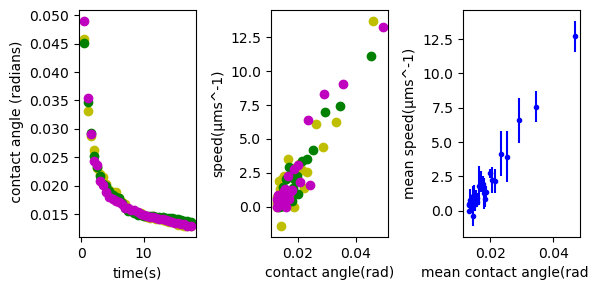

In [36]:
# write your code here
fig, ax = plt.subplots(1, 3)
plt.subplot(1,3,1)
plt.plot(time,Contact_angles[0],'yo')
plt.plot(time,Contact_angles[1],'go')
plt.plot(time,Contact_angles[2],'mo')
plt.ylabel(' contact angle (radians)')
plt.xlabel('time(s)')

plt.subplot(1,3,2)
plt.plot(Contact_angles[0],finding_speed(radius_data1,time),'yo')
plt.plot(Contact_angles[1],finding_speed(radius_data2,time),'go')
plt.plot(Contact_angles[2],finding_speed(radius_data3,time),'mo')
plt.ylabel('speed(\u03BCms^-1)')
plt.xlabel('contact angle(rad)')



radius_Speed_std=np.std(radius_Speeds,axis=0)
radius_Speed_mean=np.mean(radius_Speeds,axis=0)
angle_Speeds_std=np.std(angle_Speeds,axis=0)
angle_Speeds_mean=np.mean(angle_Speeds,axis=0)
plt.subplot(1,3,3)
plt.errorbar(np.mean(Contact_angles,axis=0),radius_Speed_mean,
             yerr=radius_Speed_std,fmt='b.')
plt.ylabel('mean speed(\u03BCms^-1)')
plt.xlabel('mean contact angle(radians)')
print(max(radius_Speed_mean))
fig.tight_layout()
plt.show()

The data $U=U(\theta)$ obtained for each of the three experimental runs is used to estimate the relationship between the mean contact line speed and the mean contact angle, and the corresponding errors on those. The result of this is plotted below. 

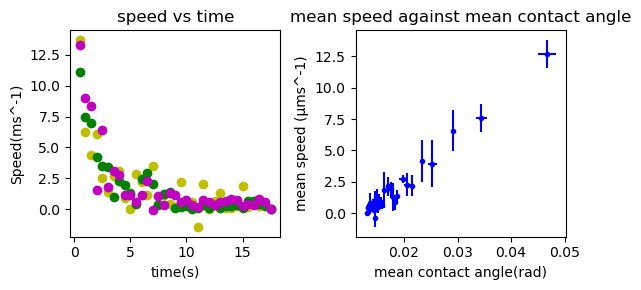

In [35]:
# write your code here
fig, ax = plt.subplots(1,2)
plt.subplot(1,2,1)
plt.plot(time,radius_Speeds[0],'yo')
plt.plot(time,radius_Speeds[1],'go')
plt.plot(time,radius_Speeds[2],'mo')
plt.ylabel('Speed(ms^-1)')
plt.xlabel('time(s)')
plt.title('speed vs time')

Contact_angle_mean=np.mean(Contact_angles,axis=0)
Contact_angle_std=np.std(Contact_angles,axis=0)

plt.subplot(1,2,2)
plt.errorbar(Contact_angle_mean,radius_Speed_mean,xerr=Contact_angle_std,yerr=radius_Speed_std,fmt='b.')
plt.xlabel('mean contact angle(rad)')
plt.ylabel('mean speed(\u03BCms^-1)')
plt.title('mean speed against mean contact angle')

fig.tight_layout()
plt.show()

![](./img/bee.png)
## Fitting Spreading Laws

We will now attemp to fit the Cox-Voinov law ($U = U_0( \theta^3 –  \theta_0^3)$) and the de Gennes law ($U = U_0( \theta^2 –  \theta_0^2)$) to the mean data $U=U(\theta)$ ploted above, where $U_0$ is termed the characteristic speed of the contact line, and $\theta_0$ is the equilibrium contact angle (when $\theta=\theta_0$, $U=0$). To avoid using nonlinear least square method, we will fit a straight line to the data $U=U(\theta^2)$ and $U=U(\theta^3)$. This will produce the values for the characteristic speed and the error on it $U_0^{fit} \pm \delta U_0^{fit}$, but it will not give the values of the equilibrium contact angle $\theta_0^{fit}$. Instead, $[U_0\theta^n]^{fit}$ with $n=2$ or $n=3$ will be found, from which $\theta_0$ can be comupted. The corresponding error $\delta\theta_0^{fit}$ should be found by propagating the errors from  $[U_0\theta^n]^{fit}$ and $U_0^{fit}$.

In [19]:
# write your code here
(Gcoef,Gcovr)=np.polyfit(Contact_angle_mean**2,radius_Speed_mean,1,cov=True)
Speed_Gennes_fit=np.polyval(Gcoef,Contact_angle_mean**2)
difference_G=(Gcoef[0]*Contact_angle_mean**2)-Speed_Gennes_fit
G_speed_0=difference_G[0]
G_theta_0=np.sqrt(G_speed_0/Gcoef[0])
delta_Gcoef_0=np.sqrt(Gcovr[0][0])

(Ccoef,Ccovr)=np.polyfit(Contact_angle_mean**3,radius_Speed_mean,1,cov=True)
Speed_CoxVoinov_fit=np.polyval(Ccoef,Contact_angle_mean**3)
difference_C=(Ccoef[0]*Contact_angle_mean**3)-Speed_CoxVoinov_fit
C_speed_0=difference_C[0]
C_theta_0=np.cbrt(C_speed_0/Ccoef[0])
delta_Ccoef_0=np.sqrt(Ccovr[0][0])



#error prop
#delta_theta_0/theta_0=1/n*delta_k/k
k_G=G_theta_0**2
delta_k_G=np.sqrt((delta_Gcoef_0/G_speed_0)**2+(delta_Gcoef_0/Gcoef[0])**2)*k_G
delta_G_theta_0=(delta_k_G/2*k_G)*G_theta_0

k_C=C_theta_0**2
delta_k_C=np.sqrt((delta_Ccoef_0/C_speed_0)**2+(delta_Ccoef_0/Ccoef[0])**2)*k_C
delta_C_theta_0=(delta_k_C/2*k_C)*C_theta_0

delta_G_U_0=delta_Gcoef_0
delta_C_U_0=delta_Ccoef_0
print('for Gennes law, \u03B8\u2080 = {theta_0} \u00B1 {delta_theta_0})'.format(theta_0=G_theta_0,delta_theta_0=delta_G_theta_0))
print('for Coix-Voinov law, \u03B8\u2080 = {theta_0} \u00B1 {delta_theta_0})'.format(theta_0=C_theta_0,delta_theta_0=delta_C_theta_0))

for Gennes law, θ₀ = 0.009785061580260664 ± 1.8624430493155046e-08)
for Coix-Voinov law, θ₀ = -0.01608444008405758 ± -8.304968609212835e-06)


Displaying the corresponding fits  

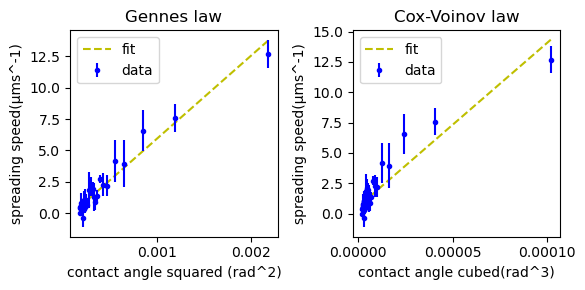

In [37]:
# write your code here
fig, ax = plt.subplots(1, 2)

plt.subplot(1,2,1)
U_G=Gcoef[0]*((Contact_angle_mean**2)-G_theta_0**2)
plt.plot(Contact_angle_mean**2,U_G,color='y',linestyle='dashed',label='fit')
plt.errorbar(Contact_angle_mean**2,radius_Speed_mean,yerr=radius_Speed_std,fmt='b.',label='data')
plt.title('Gennes law')
plt.xlabel('contact angle squared (rad^2)')
plt.ylabel('spreading speed(\u03BCms^-1)')
plt.legend()

plt.subplot(1,2,2)
U_C=Ccoef[0]*((Contact_angle_mean**3)-C_theta_0**3)
plt.plot(Contact_angle_mean**3,U_C,color='y',linestyle='dashed',label='fit')
plt.errorbar(Contact_angle_mean**3,radius_Speed_mean,yerr=radius_Speed_std,fmt='b.',label='data')
plt.title('Cox-Voinov law')
plt.xlabel('contact angle cubed(rad^3)')
plt.ylabel('spreading speed(\u03BCms^-1)')
plt.legend()
fig.tight_layout()
plt.show()

![](./img/bee.png)
## Chi-squared Test

To establish which of the two laws better fits the data, we conduct the chi-squared test. The case is further strengthened using the residual plots. 

for Gennes law, Χ²=1.00243
for Cox-Voinov, Χ²=3.21846


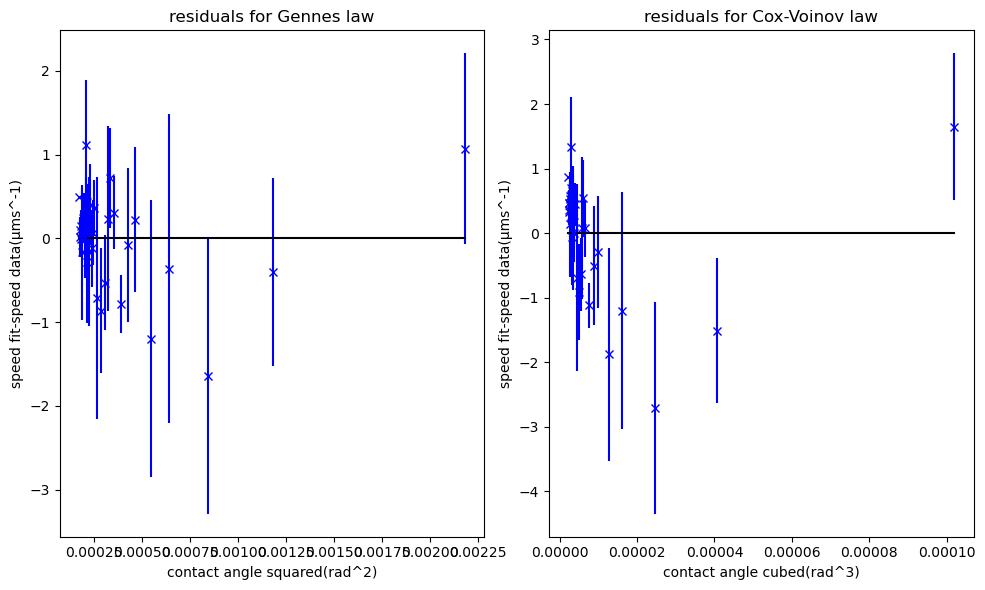

In [38]:
# write your code here & but also expand the description above
def chi_squared(data,fit,sigma):
    return sum((((data[:-1]-fit[:-1])/sigma[:-1])**2))


fig, ax = plt.subplots(1,2,figsize=(10,6))
#Gennes law
R_chi_squared_G=chi_squared(radius_Speed_mean,U_G,radius_Speed_std)/(np.size(U_G[:-1])-2)
plt.subplot(1,2,1)
plt.errorbar(Contact_angle_mean**2,U_G-radius_Speed_mean,yerr=radius_Speed_std,fmt='bx')
Zeros=np.zeros([35])
plt.plot(Contact_angle_mean**2,Zeros,color='black')
plt.title('residuals for Gennes law')
plt.xlabel('contact angle squared(rad^2)')
plt.ylabel('speed fit-speed data(\u03BCms^-1)')

print('for Gennes law, \u03A7\u00B2={:4.5f}'.format(R_chi_squared_G))

#Cox-voinox law
R_chi_squared_C=chi_squared(radius_Speed_mean,U_C,radius_Speed_std)/(np.size(U_C[:-1])-2)
plt.subplot(1,2,2)
plt.errorbar(Contact_angle_mean**3,U_C-radius_Speed_mean,yerr=radius_Speed_std,fmt='bx')
plt.plot(Contact_angle_mean**3,Zeros,color='black')
plt.title('residuals for Cox-Voinov law')
plt.xlabel('contact angle cubed(rad^3)')
plt.ylabel('speed fit-speed data(\u03BCms^-1)')
print('for Cox-Voinov, \u03A7\u00B2={:4.5f}'.format(R_chi_squared_C))

plt.tight_layout()
plt.show()


![](./img/bee.png)
## Drop Spreading Law Is

The results of the chi-squared analysis suggest that the "" law is a better fit for the behaviour of the spreading drop because ...  

In [26]:
# write your code here & but also expand the description above
print('The results of the chi-squared analysis suggest that the "" law is a better fit for the behaviour of the spreading drop because the reduced chi squared is closer to 1 for Gennes law, showing that the fit matches the data much better.')

#the reduced chi squared is closer to 1 for Gennes law, showing that the fit matches the data much better.

The results of the chi-squared analysis suggest that the "" law is a better fit for the behaviour of the spreading drop because the reduced chi squared is closer to 1 for Gennes law, showing that the fit matches the data much better.
